# مقدمه‌ای بر یادگیری ماشین و تابع جداسازی سیگنال و بک‌گراند

این دفترچه‌ی ژوپیتر برای آموزش مفاهیم مقدماتی یادگیری ماشین از دیدگاه فیزیک طراحی شده است. هدف اصلی این است که نشان دهیم یادگیری ماشین در اصل **یافتن یک تابع مناسب** است که بتواند بین داده‌های مختلف (مثلاً سیگنال و بک‌گراند) تمایز قائل شود.

در این مسیر از مثال‌های ساده و شهودی استفاده می‌کنیم تا دانشجویان فیزیک درک عمیق‌تری از مفاهیم **تابع، پارامتر، بهینه‌سازی و ارزیابی مدل** پیدا کنند.

## ۱. یادگیری ماشین یعنی یافتن تابع

در یادگیری ماشین، هدف اصلی یافتن تابعی است که بتواند رابطه‌ی بین ورودی‌ها و خروجی‌ها را مدل کند:

$$ y = f(x; \theta) $$

در این رابطه، $x$ ورودی‌ها هستند (ویژگی‌ها)، $y$ خروجی مورد انتظار است، و $\theta$ مجموعه‌ای از پارامترهایی است که باید **یاد گرفته شوند** تا تابع $f$ بهترین پیش‌بینی ممکن را انجام دهد.

### مثال انسانی
کودکی را در نظر بگیرید که در حال یادگیری تشخیص حیوانات است. او با مشاهده‌ی تصاویر مختلف از سگ و گربه، به تدریج می‌آموزد که چه ویژگی‌هایی (گوش، دم، اندازه‌ی بدن و غیره) مربوط به هرکدام هستند. در واقع، مغز کودک در حال یافتن تابعی $f$ است که ویژگی‌های بصری را به دسته‌ی درست تبدیل کند. این تابع دارای پارامترهایی است که با تجربه تنظیم می‌شوند.

همین مفهوم در یادگیری ماشین رخ می‌دهد: ما پارامترهای یک مدل ریاضی را طوری تنظیم می‌کنیم که خروجی پیش‌بینی‌شده تا حد ممکن به خروجی واقعی نزدیک باشد.

📚 **ارجاعات:**
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning.* Springer.
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning.* MIT Press.

## ۲. شروع با یک مثال فیزیکی ساده: تابع پله برای جداسازی سیگنال و بک‌گراند

فرض کنید در یک آزمایش فیزیکی می‌خواهیم بین دو نوع رویداد تمایز قائل شویم:
- **سیگنال (Signal):** رویدادهایی که واقعه‌ی مورد نظر ما را نشان می‌دهند.
- **بک‌گراند (Background):** رویدادهایی که مشابه هستند ولی مربوط به فرآیند دیگری‌اند.

برای سادگی، فرض می‌کنیم که هرکدام از این دو دسته توزیع گاوسی (نرمال) دارند. ما یک تابع پله (threshold function) تعریف می‌کنیم که اگر مقدار مشاهده‌شده از یک آستانه بزرگ‌تر بود، آن رویداد را سیگنال در نظر بگیریم وگرنه بک‌گراند.

$$

y =
\begin{cases}
1 & \text{if signal (true)} \\
0 & \text{if background (false)}
\end{cases}

$$

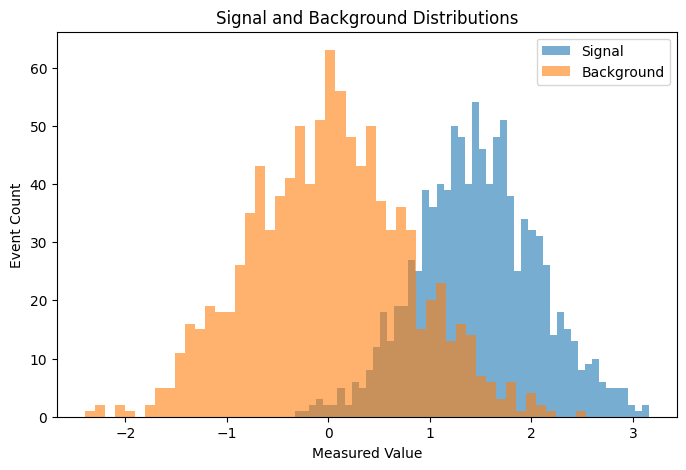

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate data
n = 1000
mean_S, sigma_S = 1.5, 0.6
mean_B, sigma_B = 0.0, 0.8

signal = np.random.normal(mean_S, sigma_S, n)
background = np.random.normal(mean_B, sigma_B, n)

# Plot distributions
plt.figure(figsize=(8,5))
plt.hist(signal, bins=50, alpha=0.6, label='Signal')
plt.hist(background, bins=50, alpha=0.6, label='Background')
plt.xlabel('Measured Value')
plt.ylabel('Event Count')
plt.title('Signal and Background Distributions')
plt.legend()
plt.show()

### تعریف تابع پله و محاسبه معیارهای عملکرد
تابع پله را به شکل زیر تعریف میکنیم:

$$
f(x) = 
\begin{cases}
1 & x > t \\
0 & \text{otherwise}
\end{cases}
$$

با تغییر آستانه، می‌توانیم ببینیم که چه مقدار از سیگنال و بک‌گراند به درستی یا نادرستی طبقه‌بندی می‌شوند. برای این منظور از مفاهیم زیر استفاده می‌کنیم:

- **True Positive (TP):** سیگنال‌هایی که درست تشخیص داده شده‌اند.
- **False Positive (FP):** بک‌گراندهایی که اشتباهاً سیگنال تشخیص داده شده‌اند.
- **False Negative (FN):** سیگنال‌هایی که از دست رفته‌اند.
- **True Negative (TN):** بک‌گراندهایی که درست شناسایی شده‌اند.

با استفاده از این چهار کمیت، معیارهای زیر تعریف می‌شوند:

$$ \text{Precision} = \frac{TP}{TP + FP} $$
$$ \text{Recall} = \frac{TP}{TP + FN} $$
$$ F1 = 2 \cdot \frac{Precision \times Recall}{Precision + Recall} $$

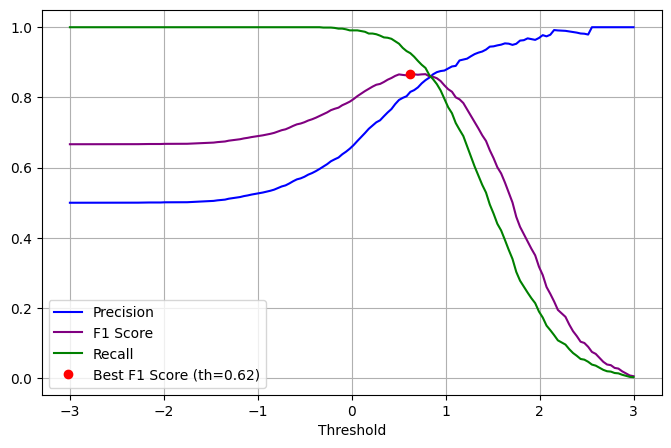

In [ ]:
def precision_recall_f1(signal, background, threshold):
    TP = np.sum(signal > threshold)
    FP = np.sum(background > threshold)
    FN = np.sum(signal <= threshold)
    TN = np.sum(background <= threshold)
    prec = TP / (TP + FP + 1e-12)
    rec = TP / (TP + FN + 1e-12)
    f1 = 2 * prec * rec / (prec + rec + 1e-12)
    return prec, rec, f1, TP, FP, FN, TN

# Evaluate metrics over thresholds

thresholds = np.linspace(-3, 3, 150)
f1_values = []
prec_values = []
rec_values = []

for t in thresholds:
    prec, rec, f1, _, _, _, _ = precision_recall_f1(signal, background, t)
    f1_values.append(f1)
    prec_values.append(prec)
    rec_values.append(rec)

max_f1 = np.argmax(f1_values)
best_threshold = thresholds[max_f1]

plt.figure(figsize=(8,5))
plt.plot(thresholds, prec_values, color='blue', label='Precision')
plt.plot(thresholds, f1_values, color='purple' , label='F1 Score')
plt.plot(thresholds, rec_values, color='green', label='Recall')
plt.plot(best_threshold, f1_values[max_f1], 'ro', label='Best F1 Score (th={:.2f})'.format(best_threshold))
plt.legend()
plt.xlabel('Threshold') 
plt.grid(True)
plt.show()

### اثرات پنهای بک گراند بر مقدار بهینه ی برش

کد زیر کل فرایند بالا را با مقادیر داده شده برای پارامترهای مسئله تکرار میکند و مقدار بهینه ی برش را بر میگرداند:

In [12]:
def FinBestThreshold(mu_s , sigma_s , mu_b , sigma_b , N_s , N_b):
    signal = np.random.normal(mu_s, sigma_s, N_s)
    background = np.random.normal(mu_b, sigma_b, N_b)

    thresholds = np.linspace(-3, 3, 150)
    f1_values = []
    prec_values = []
    rec_values = []

    for t in thresholds:
        prec, rec, f1, _, _, _, _ = precision_recall_f1(signal, background, t)
        f1_values.append(f1)
        prec_values.append(prec)
        rec_values.append(rec)

    max_f1 = np.argmax(f1_values)
    best_threshold = thresholds[max_f1]
    prec_at_threshold = prec_values[max_f1]
    rec_at_threshold = rec_values[max_f1]
    
    return best_threshold, f1_values[max_f1] , prec_at_threshold, rec_at_threshold


با استفاده از این کد می توان اثر پهنای پس زمینه بر برش بهینه را مطالعه کرد:

  0%|          | 0/40 [00:00<?, ?it/s]

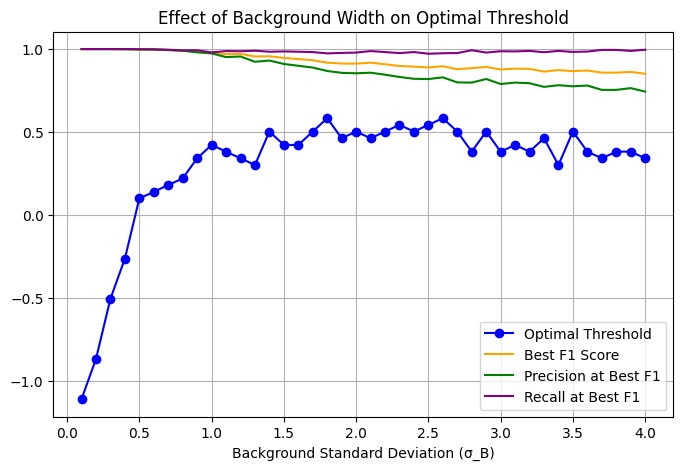

In [ ]:
from tqdm.notebook import tqdm

sigma_vals = []
best_thresholds = []
best_f1s = []
precs = []
recalls = []

for sigma_b in tqdm(np.linspace(0.1, 4.0, 40)):
    best_th , best_f1 , prec_ , recall_ = FinBestThreshold(1.5, 0.5, -1.5, sigma_b, 1000, 1000)
    sigma_vals.append(sigma_b)
    best_thresholds.append(best_th)
    best_f1s.append(best_f1)
    precs.append(prec_)
    recalls.append(recall_)

plt.figure(figsize=(8,5))
plt.plot(sigma_vals, best_thresholds, marker='o' , label='Optimal Threshold', color='blue')
plt.plot(sigma_vals, best_f1s , label='Best F1 Score', color='orange')
plt.plot(sigma_vals, precs , label='Precision at Best F1', color='green')
plt.plot(sigma_vals, recalls , label='Recall at Best F1', color='purple')
plt.legend()
plt.xlabel('Background Standard Deviation (σ_B)')
plt.title('Effect of Background Width on Optimal Threshold')
plt.grid(True)
plt.show()

همانطور که در شکل بالا پیداست، با افزایش پهنای بک گراند مقدار بهینه‌ی برش به دست آمده از طریق f1 به یک مقدار ثابت (در اینجا ۰٫۵) میل می‌کند.

اگر چه با این افزایش مقدار precission کاهش می‌یابد.

### اثر تغییر دادن سایز نمونه ها

در مثال‌های بالا نسبت تعداد سیگنال به پس زمینه برابر با یک بود. می‌توان انتظار داشت این نسبت نیز تاثیر در بهینه کردن پارامتر داشته باشد. می‌توانیم برای مطالعه ی این موضوع از کدهای نوشته شده در بخش قبل به خوبی استفاده کنیم

  0%|          | 0/10 [00:00<?, ?it/s]

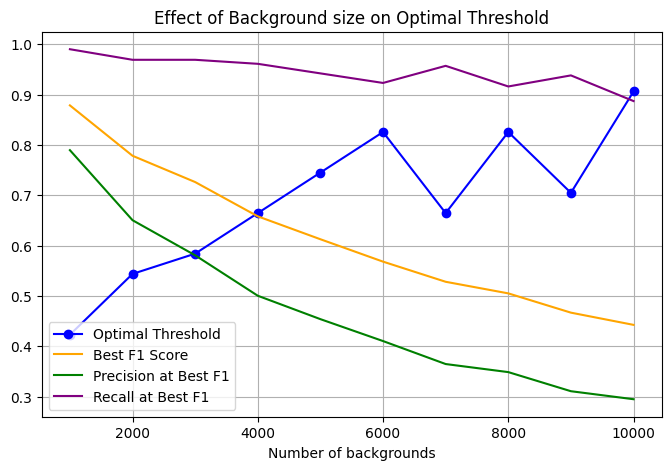

In [18]:
nBkgs = np.linspace(1000 , 10000 , 10)
best_thresholds = []
best_f1s = []
precs = []
recalls = []

for nBkg in tqdm(nBkgs): 
    best_th , best_f1 , prec_ , recall_ = FinBestThreshold(1.5, 0.5, -1.5, 3 , 1000, int(nBkg))
    
    best_thresholds.append(best_th)
    best_f1s.append(best_f1)
    precs.append(prec_)
    recalls.append(recall_)

plt.figure(figsize=(8,5))
plt.plot(nBkgs, best_thresholds, marker='o' , label='Optimal Threshold', color='blue')
plt.plot(nBkgs, best_f1s , label='Best F1 Score', color='orange')
plt.plot(nBkgs, precs , label='Precision at Best F1', color='green')
plt.plot(nBkgs, recalls , label='Recall at Best F1', color='purple')
plt.legend()
plt.xlabel('Number of backgrounds')
plt.title('Effect of Background size on Optimal Threshold')
plt.grid(True)
plt.show()

باید دقت داشت که تمام کمیت هایی که تا به حال مطالعه کرده ایم اطلاعات سایز سمپل ها را در خود نداشته اند و همه نسبی بوده اند.

دو کمیت زیر برای این موارد می‌توانند مفید تر باشند:

#### نسبت سیگنال به پس زمینه

این کمیت نسبت سیگنال به پس زمینه در ناحیه ی برش را نشان می دهد
$$
SON =\dfrac{ N_{s} \times TPR }{N_{b} \times FPR}
$$

#### اهمیت آماری
این کمیت نسبت سیگنال در ناحیه ی انتخاب شده به خطای روی پس زمینه را نشان میدهد

$$
Significance =\dfrac{ N_{s} \times TPR }{\sqrt{N_{b} \times FPR}}
$$

می‌توانیم این کمیت ها را نیز به پلاتها اضافه کنیم


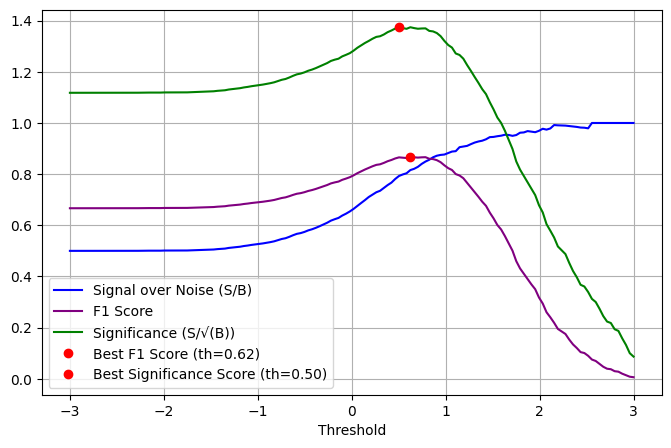

In [24]:
thresholds = np.linspace(-3, 3, 150)
f1_values = []
SON_values = []
Sig_values = []

for t in thresholds:
    _, _ , f1 , TP, FP, FN, TN = precision_recall_f1(signal, background, t)
    f1_values.append(f1)
    SON_values.append(TP / (TP + FP + 1e-12) )
    Sig_values.append(0.05*TP / np.sqrt(TP + FP + 1e-12))

max_f1 = np.argmax(f1_values)
best_threshold = thresholds[max_f1]

max_sig = np.argmax(Sig_values)
best_threshold2 = thresholds[max_sig]

plt.figure(figsize=(8,5))
plt.plot(thresholds, SON_values, color='blue', label='Signal over Noise (S/B)')
plt.plot(thresholds, f1_values, color='purple' , label='F1 Score')
plt.plot(thresholds, Sig_values, color='green', label='Significance (S/√(B))')
plt.plot(best_threshold, f1_values[max_f1], 'ro', label='Best F1 Score (th={:.2f})'.format(best_threshold))
plt.plot(best_threshold2, Sig_values[max_sig], 'ro', label='Best Significance Score (th={:.2f})'.format(best_threshold2))
plt.legend()
plt.xlabel('Threshold') 
plt.grid(True)
plt.show()

همانطور که از شکل پیداست متریک های f1 و اهمیت آماری هر دو مقادیر نسبتا مشابهی برای مقدار بهینه ی پارامتر پیشنهاد می‌کنند. البته این اتفاق در مسئله ی فعلی پیش امده و ممکن است در چیدمانهای متفاوت سیگنال و پس زمینه تفاوت چشمگیری وجود داشته باشد.

## ۳. منحنی ROC و سطح زیر نمودار (AUC)

منحنی ROC (Receiver Operating Characteristic) رابطه‌ای بین نرخ مثبت واقعی (TPR) و نرخ مثبت کاذب (FPR) است:

$$ \text{TPR} = \frac{TP}{TP + FN}, \quad \text{FPR} = \frac{FP}{FP + TN} $$

در این نمودار:
- نقطه‌ی (0,1) حالت ایده‌آل است (بدون FP و با حداکثر TP)
- خط $x = y$ نمایانگر حد تصادفی بودن طبقه‌بندی است.

مساحت زیر منحنی ROC، موسوم به **AUC**، عددی بین 0 و 1 است که کیفیت کلی مدل را نشان می‌دهد.

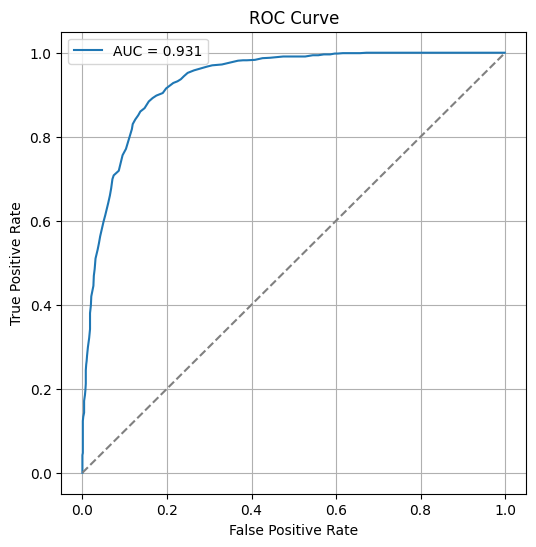

In [3]:
def compute_roc(signal, background):
    all_values = np.concatenate([signal, background])
    thresholds = np.linspace(all_values.min(), all_values.max(), 200)
    tpr_list, fpr_list = [], []
    for t in thresholds:
        TP = np.sum(signal > t)
        FP = np.sum(background > t)
        FN = np.sum(signal <= t)
        TN = np.sum(background <= t)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    auc = np.trapz(sorted(tpr_list), sorted(fpr_list))
    return np.array(fpr_list), np.array(tpr_list), auc

fpr, tpr, auc = compute_roc(signal, background)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## چند تمرین

۱. **تغییر توزیع بک‌گراند به نمایی:** ببینید ROC و F1 چگونه تغییر می‌کنند.

۲. **پهنای بک‌گراند و نسبت S/B:** اثر این دو پارامتر را بر آستانه‌ی بهینه بررسی کنید.

